In [1]:
if 1 :
    %matplotlib inline
else :
    %matplotlib notebook

#  Import  libraries

In [2]:
import sys
import os
module_path = os.path.abspath('.') +"\\_scripts"
print(module_path)

if module_path not in sys.path:
    sys.path.append(module_path)
from _00_Import_packages_git3 import *

C:\Users\ng947ac\Documents\Daniel\jupyter\SoSTrades\jupyter_doc\_scripts
C:\Users\ng947ac\Documents\Daniel\git\workspace
C:\Users\ng947ac\Documents\Daniel\git\workspace\sosgemseo\src\
C:\Users\ng947ac\Documents\Daniel\git\workspace\sostrades-core


In [3]:
from platform import python_version

print(python_version())

3.9.7


In [4]:
import numpy
print(numpy.__version__)

1.20.3


In [5]:
import scipy
print(scipy.__version__)

1.7.1


In [6]:
import pandas
print(pandas.__version__)

1.3.0


In [7]:
from numpy import array
import pandas as pd
from sos_trades_core.execution_engine.execution_engine import ExecutionEngine
from numpy.testing import assert_array_equal, assert_array_almost_equal  # @UnresolvedImport
import os
from gemseo.core.mdo_scenario import MDOScenario

# 1) Set up

In [8]:
#from sos_trades_core.sos_wrapping.test_discs.sellar import Sellar1
from sos_trades_core.execution_engine.execution_engine import ExecutionEngine

In [9]:
study_name = 'optim'
ns = f'{study_name}'
sc_name = "SobOptimScenario"

In [10]:
repo = 'sos_trades_core.sos_processes.test'
proc_name = 'test_sobieski_opt_bilevel'

# 2) Sobieski optim builder

In [11]:
exec_eng = ExecutionEngine(study_name)
ns_dict={'ns_OptimSobieski': study_name + '.SobOptimScenario'}
#exec_eng.ns_manager.add_ns_def(ns_dict)
exec_eng.ns_manager.add_ns('ns_OptimSobieski', study_name + '.SobOptimScenario')
factory = exec_eng.factory
builder = factory.get_builder_from_process(repo=repo,mod_id=proc_name)
exec_eng.factory.set_builders_to_coupling_builder(builder)

In [12]:
exec_eng.configure() 

INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi


In [13]:
exec_eng.display_treeview_nodes()

INFO:SoS.EE:Nodes representation for Treeview optim
|_ optim
	|_ SobOptimScenario
		|_ sc_struct
			|_ struct
		|_ sc_aero
			|_ aero
		|_ sc_prop
			|_ prop
		|_ mission


'Nodes representation for Treeview optim\n|_ optim\n\t|_ SobOptimScenario\n\t\t|_ sc_struct\n\t\t\t|_ struct\n\t\t|_ sc_aero\n\t\t\t|_ aero\n\t\t|_ sc_prop\n\t\t\t|_ prop\n\t\t|_ mission'

In [14]:
exec_eng.display_treeview_nodes(True)

INFO:SoS.EE:Nodes representation for Treeview optim
|_ optim
	-> acceleration
	-> authorize_self_coupled_disciplines
	-> cache_file_path
	-> cache_type
	-> chain_linearize
	-> debug_mode
	-> epsilon0
	-> group_mda_disciplines
	-> linear_solver_MDA
	-> linear_solver_MDA_options
	-> linear_solver_MDA_preconditioner
	-> linear_solver_MDO
	-> linear_solver_MDO_options
	-> linear_solver_MDO_preconditioner
	-> linearization_mode
	-> max_mda_iter
	-> n_processes
	-> n_subcouplings_parallel
	-> relax_factor
	-> sub_mda_class
	-> tolerance
	-> tolerance_gs
	-> use_lu_fact
	-> warm_start
	-> warm_start_threshold
	<- residuals_history
	|_ SobOptimScenario
		-> algo
		-> algo_options
		-> cache_file_path
		-> cache_type
		-> debug_mode
		-> design_space
		-> differentiation_method
		-> eq_constraints
		-> eval_jac
		-> eval_mode
		-> execute_at_xopt
		-> formulation
		-> ineq_constraints
		-> linearization_mode
		-> max_iter
		-> maximize_objective
		-> objective_name
		-> parallel_options
		-> x_

'Nodes representation for Treeview optim\n|_ optim\n\t-> acceleration\n\t-> authorize_self_coupled_disciplines\n\t-> cache_file_path\n\t-> cache_type\n\t-> chain_linearize\n\t-> debug_mode\n\t-> epsilon0\n\t-> group_mda_disciplines\n\t-> linear_solver_MDA\n\t-> linear_solver_MDA_options\n\t-> linear_solver_MDA_preconditioner\n\t-> linear_solver_MDO\n\t-> linear_solver_MDO_options\n\t-> linear_solver_MDO_preconditioner\n\t-> linearization_mode\n\t-> max_mda_iter\n\t-> n_processes\n\t-> n_subcouplings_parallel\n\t-> relax_factor\n\t-> sub_mda_class\n\t-> tolerance\n\t-> tolerance_gs\n\t-> use_lu_fact\n\t-> warm_start\n\t-> warm_start_threshold\n\t<- residuals_history\n\t|_ SobOptimScenario\n\t\t-> algo\n\t\t-> algo_options\n\t\t-> cache_file_path\n\t\t-> cache_type\n\t\t-> debug_mode\n\t\t-> design_space\n\t\t-> differentiation_method\n\t\t-> eq_constraints\n\t\t-> eval_jac\n\t\t-> eval_mode\n\t\t-> execute_at_xopt\n\t\t-> formulation\n\t\t-> ineq_constraints\n\t\t-> linearization_mode\n

# 3) Design Space

In [15]:
dspace_dict = {'variable': ['z', 'x_1', 'x_2', 'x_3'],
               'value': [
                        [0.05, 45000.0,1.6,5.5,55.0,1000.0], 
                        [0.25, 1.0], 
                        [1.0],
                        [0.5]],
               'lower_bnd': [
                        [0.01,30000.0,1.4,2.5,40.0,500.0], 
                        [0.1,0.75], 
                        [0.75],
                        [0.1]],
               'upper_bnd': [
                        [0.09,60000.0,1.8,8.5,70.0,1500.0], 
                        [0.4,1.25], 
                        [1.25],
                        [1.0]],
               'enable_variable': [True, True, True, True],
               'activated_elem': [[True, True, True, True, True, True], [True, True], [True], [True]]}

In [16]:
dspace = pd.DataFrame(dspace_dict)
dspace

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,z,"[0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0]","[0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]","[0.09, 60000.0, 1.8, 8.5, 70.0, 1500.0]",True,"[True, True, True, True, True, True]"
1,x_1,"[0.25, 1.0]","[0.1, 0.75]","[0.4, 1.25]",True,"[True, True]"
2,x_2,[1.0],[0.75],[1.25],True,[True]
3,x_3,[0.5],[0.1],[1.0],True,[True]


In [17]:
#dspace.to_dict('list')

In [18]:
dspace_coupl_dict = {'variable': ['y_14','y_32','y_31','y_24','y_34','y_23','y_21','y_12'],
               'value': [
                        [50606.9741711,7306.20262124], 
                        [0.50279625], 
                        [6354.32430691],
                        [4.15006276],
                        [1.10754577],
                        [12194.2671934],
                        [50606.9741711],
                        [50606.9742,0.95]
                        ],
               'lower_bnd':  [
                        [24850.0,-7700.0], 
                        [0.235], 
                        [2960.0],
                        [0.44],
                        [0.44],
                        [3365.0],
                        [24850.0],
                        [24850.0,0.45]
                        ],
               'upper_bnd':   [
                        [77100.0,45000.0], 
                        [0.795], 
                        [10185.0],
                        [11.13],
                        [1.98],
                        [26400.0],
                        [77250.0],
                        [77250.0,1.5]
                        ],
               'enable_variable': [True, True, True, True, True, True, True, True],
               'activated_elem': [[True, True], [True], [True], [True], [True], [True], [True],[True, True]]}

In [19]:
dspace_coupl = pd.DataFrame(dspace_coupl_dict)
dspace_coupl

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,y_14,"[50606.9741711, 7306.20262124]","[24850.0, -7700.0]","[77100.0, 45000.0]",True,"[True, True]"
1,y_32,[0.50279625],[0.235],[0.795],True,[True]
2,y_31,[6354.32430691],[2960.0],[10185.0],True,[True]
3,y_24,[4.15006276],[0.44],[11.13],True,[True]
4,y_34,[1.10754577],[0.44],[1.98],True,[True]
5,y_23,[12194.2671934],[3365.0],[26400.0],True,[True]
6,y_21,[50606.9741711],[24850.0],[77250.0],True,[True]
7,y_12,"[50606.9742, 0.95]","[24850.0, 0.45]","[77250.0, 1.5]",True,"[True, True]"


In [20]:
# merge dataframe (add lines)
frames = [dspace,dspace_coupl]
dspace_all = pd.concat(frames)
dspace_all

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,z,"[0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0]","[0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]","[0.09, 60000.0, 1.8, 8.5, 70.0, 1500.0]",True,"[True, True, True, True, True, True]"
1,x_1,"[0.25, 1.0]","[0.1, 0.75]","[0.4, 1.25]",True,"[True, True]"
2,x_2,[1.0],[0.75],[1.25],True,[True]
3,x_3,[0.5],[0.1],[1.0],True,[True]
0,y_14,"[50606.9741711, 7306.20262124]","[24850.0, -7700.0]","[77100.0, 45000.0]",True,"[True, True]"
1,y_32,[0.50279625],[0.235],[0.795],True,[True]
2,y_31,[6354.32430691],[2960.0],[10185.0],True,[True]
3,y_24,[4.15006276],[0.44],[11.13],True,[True]
4,y_34,[1.10754577],[0.44],[1.98],True,[True]
5,y_23,[12194.2671934],[3365.0],[26400.0],True,[True]


In [21]:
# convert dataframe to dict
dspace_all_dict = dspace_all.to_dict('list')

In [22]:
dspace_struct = dspace.loc[dspace['variable'] == 'x_1'].reset_index(drop=True)
dspace_struct

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,x_1,"[0.25, 1.0]","[0.1, 0.75]","[0.4, 1.25]",True,"[True, True]"


In [23]:
dspace_aero = dspace.loc[dspace['variable'] == 'x_2'].reset_index(drop=True)
dspace_aero

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,x_2,[1.0],[0.75],[1.25],True,[True]


In [24]:
dspace_prop = dspace.loc[dspace['variable'] == 'x_3'].reset_index(drop=True)
dspace_prop

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,x_3,[0.5],[0.1],[1.0],True,[True]


In [25]:
dspace_bi_mission = dspace.loc[dspace['variable'] == 'z'].reset_index(drop=True)
dspace_bi_mission

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,z,"[0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0]","[0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]","[0.09, 60000.0, 1.8, 8.5, 70.0, 1500.0]",True,"[True, True, True, True, True, True]"


# 4) Optim and Sobieski inputs

In [26]:
#-- set up disciplines in Scenario
disc_dict = {}
disc_dict[f'{ns}.tolerance'] = 1e-14
disc_dict[f'{ns}.max_mda_iter'] = 30
#disc_dict[f'{ns}.warm_start'] = True
#disc_dict[f'{ns}.use_lu_fact'] = True
disc_dict

{'optim.tolerance': 1e-14, 'optim.max_mda_iter': 30}

In [27]:
exec_eng.dm.set_values_from_dict(disc_dict)

In [28]:
algo_options = {'xtol_rel': 1e-7, 
               'xtol_abs': 1e-7,
               'ftol_rel': 1e-7, 
               'ftol_abs': 1e-7,
                'ineq_tolerance': 1e-4}

# 4.1 sc_struct inputs

In [29]:
sub_scenario = 'sc_struct'
#-- set up disciplines in Scenario
disc_dict = {}
# Optim inputs
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.max_iter'] = 30
# SLSQP, NLOPT_SLSQP
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo'] = "SLSQP"
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.design_space'] = dspace_struct
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.formulation'] = 'DisciplinaryOpt'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.objective_name'] = 'y_11'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.maximize_objective'] = True
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.ineq_constraints'] = [f'g_1']
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo_options'] = algo_options
disc_dict

{'optim.SobOptimScenario.sc_struct.max_iter': 30,
 'optim.SobOptimScenario.sc_struct.algo': 'SLSQP',
 'optim.SobOptimScenario.sc_struct.design_space':   variable        value    lower_bnd    upper_bnd  enable_variable  \
 0      x_1  [0.25, 1.0]  [0.1, 0.75]  [0.4, 1.25]             True   
 
   activated_elem  
 0   [True, True]  ,
 'optim.SobOptimScenario.sc_struct.formulation': 'DisciplinaryOpt',
 'optim.SobOptimScenario.sc_struct.objective_name': 'y_11',
 'optim.SobOptimScenario.sc_struct.maximize_objective': True,
 'optim.SobOptimScenario.sc_struct.ineq_constraints': ['g_1'],
 'optim.SobOptimScenario.sc_struct.algo_options': {'xtol_rel': 1e-07,
  'xtol_abs': 1e-07,
  'ftol_rel': 1e-07,
  'ftol_abs': 1e-07,
  'ineq_tolerance': 0.0001}}

In [30]:
exec_eng.dm.set_values_from_dict(disc_dict)

# 4.2 sc_aero inputs

In [31]:
sub_scenario = 'sc_aero'
#-- set up disciplines in Scenario
disc_dict = {}
# Optim inputs
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.max_iter'] = 30
# SLSQP, NLOPT_SLSQP
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo'] = "SLSQP"
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.design_space'] = dspace_aero
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.formulation'] = 'DisciplinaryOpt'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.objective_name'] = 'y_24'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.maximize_objective'] = True
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.ineq_constraints'] = [f'g_2']
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo_options'] = algo_options
disc_dict

{'optim.SobOptimScenario.sc_aero.max_iter': 30,
 'optim.SobOptimScenario.sc_aero.algo': 'SLSQP',
 'optim.SobOptimScenario.sc_aero.design_space':   variable  value lower_bnd upper_bnd  enable_variable activated_elem
 0      x_2  [1.0]    [0.75]    [1.25]             True         [True],
 'optim.SobOptimScenario.sc_aero.formulation': 'DisciplinaryOpt',
 'optim.SobOptimScenario.sc_aero.objective_name': 'y_24',
 'optim.SobOptimScenario.sc_aero.maximize_objective': True,
 'optim.SobOptimScenario.sc_aero.ineq_constraints': ['g_2'],
 'optim.SobOptimScenario.sc_aero.algo_options': {'xtol_rel': 1e-07,
  'xtol_abs': 1e-07,
  'ftol_rel': 1e-07,
  'ftol_abs': 1e-07,
  'ineq_tolerance': 0.0001}}

In [32]:
exec_eng.dm.set_values_from_dict(disc_dict)

# 4.3 sc_prop inputs

In [33]:
sub_scenario = 'sc_prop'
#-- set up disciplines in Scenario
disc_dict = {}
# Optim inputs
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.max_iter'] = 30
# SLSQP, NLOPT_SLSQP
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo'] = "SLSQP"
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.design_space'] = dspace_prop
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.formulation'] = 'DisciplinaryOpt'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.objective_name'] = 'y_34'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.maximize_objective'] = False
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.ineq_constraints'] = [f'g_3']
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo_options'] = algo_options
disc_dict

{'optim.SobOptimScenario.sc_prop.max_iter': 30,
 'optim.SobOptimScenario.sc_prop.algo': 'SLSQP',
 'optim.SobOptimScenario.sc_prop.design_space':   variable  value lower_bnd upper_bnd  enable_variable activated_elem
 0      x_3  [0.5]     [0.1]     [1.0]             True         [True],
 'optim.SobOptimScenario.sc_prop.formulation': 'DisciplinaryOpt',
 'optim.SobOptimScenario.sc_prop.objective_name': 'y_34',
 'optim.SobOptimScenario.sc_prop.maximize_objective': False,
 'optim.SobOptimScenario.sc_prop.ineq_constraints': ['g_3'],
 'optim.SobOptimScenario.sc_prop.algo_options': {'xtol_rel': 1e-07,
  'xtol_abs': 1e-07,
  'ftol_rel': 1e-07,
  'ftol_abs': 1e-07,
  'ineq_tolerance': 0.0001}}

In [34]:
exec_eng.dm.set_values_from_dict(disc_dict)

# 4.4 SobOptimScenario inputs

In [35]:
from gemseo.algos.opt.opt_factory import OptimizersFactory
algo_list = OptimizersFactory().algorithms
print("Available algorithms:" +str(algo_list))

Available algorithms:['CMAES', 'NLOPT_MMA', 'NLOPT_COBYLA', 'NLOPT_SLSQP', 'NLOPT_BOBYQA', 'NLOPT_BFGS', 'NLOPT_NEWUOA', 'DUAL_ANNEALING', 'SHGO', 'DIFFERENTIAL_EVOLUTION', 'LINEAR_INTERIOR_POINT', 'REVISED_SIMPLEX', 'SIMPLEX', 'SLSQP', 'L-BFGS-B', 'TNC']


In [36]:
#-- set up disciplines in Scenario
disc_dict = {}
# Optim inputs
disc_dict[f'{ns}.{sc_name}.max_iter'] = 50
# SLSQP, NLOPT_SLSQP
disc_dict[f'{ns}.{sc_name}.algo'] = "NLOPT_COBYLA"
disc_dict[f'{ns}.{sc_name}.design_space'] = dspace_all# in gemseo I would habve provided dspace_bi_mission In SoStrades I need dspace_all! (if not I have an error???)
disc_dict[f'{ns}.{sc_name}.formulation'] = 'BiLevel'
disc_dict[f'{ns}.{sc_name}.objective_name'] = 'y_4'
disc_dict[f'{ns}.{sc_name}.maximize_objective'] = True
disc_dict[f'{ns}.{sc_name}.ineq_constraints'] = [f'g_1', f'g_2', f'g_3']
disc_dict[f'{ns}.{sc_name}.algo_options'] = algo_options
disc_dict

{'optim.SobOptimScenario.max_iter': 50,
 'optim.SobOptimScenario.algo': 'NLOPT_COBYLA',
 'optim.SobOptimScenario.design_space':   variable                                    value  \
 0        z  [0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0]   
 1      x_1                              [0.25, 1.0]   
 2      x_2                                    [1.0]   
 3      x_3                                    [0.5]   
 0     y_14           [50606.9741711, 7306.20262124]   
 1     y_32                             [0.50279625]   
 2     y_31                          [6354.32430691]   
 3     y_24                             [4.15006276]   
 4     y_34                             [1.10754577]   
 5     y_23                          [12194.2671934]   
 6     y_21                          [50606.9741711]   
 7     y_12                       [50606.9742, 0.95]   
 
                                 lower_bnd  \
 0  [0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]   
 1                             [0.1, 0.75]   
 2   

In [37]:
exec_eng.dm.set_values_from_dict(disc_dict)

In [38]:
input_vect=array([0.25, 1.0, 1.0, 0.5, 0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0])

In [39]:
[input_vect[2]]

[1.0]

# 4.5 discipline inputs

In [40]:
values_dict = {
                  f'{ns}.{sc_name}.z': [0.05,45000,1.6,5.5,55.,1000],
                  f'{ns}.{sc_name}.y_14': [50606.9,7306.20],
                  f'{ns}.{sc_name}.y_24':  [4.15], 
                  f'{ns}.{sc_name}.y_34': [1.10], 
                  f'{ns}.{sc_name}.x_1': [0.25,1.0],
                  f'{ns}.{sc_name}.y_21':  [50606.9], 
                  f'{ns}.{sc_name}.y_31': [6354.32], 
                  f'{ns}.{sc_name}.x_2': [1.0],
                  f'{ns}.{sc_name}.y_12':  [50606.9,0.95], 
                  f'{ns}.{sc_name}.y_32': [12194.2], 
                  f'{ns}.{sc_name}.x_3': [0.5],
                  f'{ns}.{sc_name}.y_23':  [12194.2], 
                  }
values_dict

{'optim.SobOptimScenario.z': [0.05, 45000, 1.6, 5.5, 55.0, 1000],
 'optim.SobOptimScenario.y_14': [50606.9, 7306.2],
 'optim.SobOptimScenario.y_24': [4.15],
 'optim.SobOptimScenario.y_34': [1.1],
 'optim.SobOptimScenario.x_1': [0.25, 1.0],
 'optim.SobOptimScenario.y_21': [50606.9],
 'optim.SobOptimScenario.y_31': [6354.32],
 'optim.SobOptimScenario.x_2': [1.0],
 'optim.SobOptimScenario.y_12': [50606.9, 0.95],
 'optim.SobOptimScenario.y_32': [12194.2],
 'optim.SobOptimScenario.x_3': [0.5],
 'optim.SobOptimScenario.y_23': [12194.2]}

In [41]:
#exec_eng.dm.set_values_from_dict(values_dict)
exec_eng.load_study_from_input_dict(values_dict)

INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi


In [42]:
exec_eng.configure()

INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi


In [43]:
exec_eng.dm.get_data_dict_values()

{'optim.sub_mda_class': 'MDAJacobi',
 'optim.max_mda_iter': 30,
 'optim.n_processes': 1,
 'optim.chain_linearize': False,
 'optim.tolerance': 1e-14,
 'optim.use_lu_fact': False,
 'optim.warm_start': False,
 'optim.acceleration': 'm2d',
 'optim.warm_start_threshold': -1,
 'optim.n_subcouplings_parallel': 1,
 'optim.tolerance_gs': 10.0,
 'optim.relax_factor': 0.99,
 'optim.epsilon0': 1e-06,
 'optim.linear_solver_MDO': 'GMRES',
 'optim.linear_solver_MDO_preconditioner': 'None',
 'optim.linear_solver_MDO_options': {'max_iter': 1000, 'tol': 1e-08},
 'optim.linear_solver_MDA': 'GMRES',
 'optim.linear_solver_MDA_preconditioner': 'None',
 'optim.linear_solver_MDA_options': {'max_iter': 1000, 'tol': 1e-08},
 'optim.group_mda_disciplines': False,
 'optim.authorize_self_coupled_disciplines': False,
 'optim.linearization_mode': 'auto',
 'optim.cache_type': 'SimpleCache',
 'optim.cache_file_path': None,
 'optim.debug_mode': '',
 'optim.SobOptimScenario.max_iter': 50,
 'optim.SobOptimScenario.ineq_c

In [44]:
#opt_disc.get_sos_disciplines()

In [45]:
#help(opt_disc)

In [46]:
#opt_disc.disciplines

In [47]:
exec_eng.display_treeview_nodes()

INFO:SoS.EE:Nodes representation for Treeview optim
|_ optim
	|_ SobOptimScenario
		|_ sc_struct
			|_ struct
		|_ sc_aero
			|_ aero
		|_ sc_prop
			|_ prop
		|_ mission


'Nodes representation for Treeview optim\n|_ optim\n\t|_ SobOptimScenario\n\t\t|_ sc_struct\n\t\t\t|_ struct\n\t\t|_ sc_aero\n\t\t\t|_ aero\n\t\t|_ sc_prop\n\t\t\t|_ prop\n\t\t|_ mission'

In [48]:
exec_eng.display_treeview_nodes(True)

INFO:SoS.EE:Nodes representation for Treeview optim
|_ optim
	-> acceleration
	-> authorize_self_coupled_disciplines
	-> cache_file_path
	-> cache_type
	-> chain_linearize
	-> debug_mode
	-> epsilon0
	-> group_mda_disciplines
	-> linear_solver_MDA
	-> linear_solver_MDA_options
	-> linear_solver_MDA_preconditioner
	-> linear_solver_MDO
	-> linear_solver_MDO_options
	-> linear_solver_MDO_preconditioner
	-> linearization_mode
	-> max_mda_iter
	-> n_processes
	-> n_subcouplings_parallel
	-> relax_factor
	-> sub_mda_class
	-> tolerance
	-> tolerance_gs
	-> use_lu_fact
	-> warm_start
	-> warm_start_threshold
	<- residuals_history
	|_ SobOptimScenario
		-> algo
		-> algo_options
		-> cache_file_path
		-> cache_type
		-> debug_mode
		-> design_space
		-> differentiation_method
		-> eq_constraints
		-> eval_jac
		-> eval_mode
		-> execute_at_xopt
		-> formulation
		-> ineq_constraints
		-> linearization_mode
		-> max_iter
		-> maximize_objective
		-> objective_name
		-> parallel_options
		-> x_

'Nodes representation for Treeview optim\n|_ optim\n\t-> acceleration\n\t-> authorize_self_coupled_disciplines\n\t-> cache_file_path\n\t-> cache_type\n\t-> chain_linearize\n\t-> debug_mode\n\t-> epsilon0\n\t-> group_mda_disciplines\n\t-> linear_solver_MDA\n\t-> linear_solver_MDA_options\n\t-> linear_solver_MDA_preconditioner\n\t-> linear_solver_MDO\n\t-> linear_solver_MDO_options\n\t-> linear_solver_MDO_preconditioner\n\t-> linearization_mode\n\t-> max_mda_iter\n\t-> n_processes\n\t-> n_subcouplings_parallel\n\t-> relax_factor\n\t-> sub_mda_class\n\t-> tolerance\n\t-> tolerance_gs\n\t-> use_lu_fact\n\t-> warm_start\n\t-> warm_start_threshold\n\t<- residuals_history\n\t|_ SobOptimScenario\n\t\t-> algo\n\t\t-> algo_options\n\t\t-> cache_file_path\n\t\t-> cache_type\n\t\t-> debug_mode\n\t\t-> design_space\n\t\t-> differentiation_method\n\t\t-> eq_constraints\n\t\t-> eval_jac\n\t\t-> eval_mode\n\t\t-> execute_at_xopt\n\t\t-> formulation\n\t\t-> ineq_constraints\n\t\t-> linearization_mode\n

In [49]:
for key in exec_eng.dm.data_id_map:
    print("key", key)

key optim.sub_mda_class
key optim.max_mda_iter
key optim.n_processes
key optim.chain_linearize
key optim.tolerance
key optim.use_lu_fact
key optim.warm_start
key optim.acceleration
key optim.warm_start_threshold
key optim.n_subcouplings_parallel
key optim.tolerance_gs
key optim.relax_factor
key optim.epsilon0
key optim.linear_solver_MDO
key optim.linear_solver_MDO_preconditioner
key optim.linear_solver_MDO_options
key optim.linear_solver_MDA
key optim.linear_solver_MDA_preconditioner
key optim.linear_solver_MDA_options
key optim.group_mda_disciplines
key optim.authorize_self_coupled_disciplines
key optim.linearization_mode
key optim.cache_type
key optim.cache_file_path
key optim.debug_mode
key optim.SobOptimScenario.max_iter
key optim.SobOptimScenario.ineq_constraints
key optim.SobOptimScenario.eq_constraints
key optim.SobOptimScenario.algo
key optim.SobOptimScenario.design_space
key optim.SobOptimScenario.formulation
key optim.SobOptimScenario.maximize_objective
key optim.SobOptimScen

In [50]:
exec_eng.dm.get_data_dict_values()

{'optim.sub_mda_class': 'MDAJacobi',
 'optim.max_mda_iter': 30,
 'optim.n_processes': 1,
 'optim.chain_linearize': False,
 'optim.tolerance': 1e-14,
 'optim.use_lu_fact': False,
 'optim.warm_start': False,
 'optim.acceleration': 'm2d',
 'optim.warm_start_threshold': -1,
 'optim.n_subcouplings_parallel': 1,
 'optim.tolerance_gs': 10.0,
 'optim.relax_factor': 0.99,
 'optim.epsilon0': 1e-06,
 'optim.linear_solver_MDO': 'GMRES',
 'optim.linear_solver_MDO_preconditioner': 'None',
 'optim.linear_solver_MDO_options': {'max_iter': 1000, 'tol': 1e-08},
 'optim.linear_solver_MDA': 'GMRES',
 'optim.linear_solver_MDA_preconditioner': 'None',
 'optim.linear_solver_MDA_options': {'max_iter': 1000, 'tol': 1e-08},
 'optim.group_mda_disciplines': False,
 'optim.authorize_self_coupled_disciplines': False,
 'optim.linearization_mode': 'auto',
 'optim.cache_type': 'SimpleCache',
 'optim.cache_file_path': None,
 'optim.debug_mode': '',
 'optim.SobOptimScenario.max_iter': 50,
 'optim.SobOptimScenario.ineq_c

In [51]:
exec_eng.dm.get_data('optim.SobOptimScenario.formulation')['value']

'BiLevel'

In [52]:
exec_eng.dm.get_data('optim.linear_solver_MDO')['value']

'GMRES'

In [53]:
exec_eng.dm.get_data('optim.sub_mda_class')['value']

'MDAJacobi'

In [54]:
exec_eng.dm.get_data('optim.tolerance')['value']

1e-14

In [55]:
exec_eng.dm.get_data('optim.max_mda_iter')['value']

30

In [56]:
exec_eng.dm.get_data('optim.warm_start')['value']

False

In [57]:
exec_eng.dm.get_data('optim.use_lu_fact')['value']

False

In [58]:
exec_eng.dm.get_data(f'{ns}.{sc_name}.algo_options')['value']

{'xtol_rel': 1e-07,
 'normalize_design_space': True,
 'xtol_abs': 1e-07,
 'ftol_rel': 1e-07,
 'ftol_abs': 1e-07,
 'max_iter': 999,
 'max_time': 0.0,
 'ctol_abs': 1e-06,
 'eq_tolerance': 0.01,
 'ineq_tolerance': 0.0001,
 'init_step': 0.25}

In [59]:
# retrieve discipline to check the result...
opt_disc = exec_eng.dm.get_disciplines_with_name("optim." + sc_name)[0]
opt_disc.get_disc_full_name()

'optim.SobOptimScenario'

In [60]:
# retrieve discipline to check the result...
#help(opt_disc)

In [61]:
#opt_disc.disciplines

In [62]:
exec_eng.display_treeview_nodes()

INFO:SoS.EE:Nodes representation for Treeview optim
|_ optim
	|_ SobOptimScenario
		|_ sc_struct
			|_ struct
		|_ sc_aero
			|_ aero
		|_ sc_prop
			|_ prop
		|_ mission


'Nodes representation for Treeview optim\n|_ optim\n\t|_ SobOptimScenario\n\t\t|_ sc_struct\n\t\t\t|_ struct\n\t\t|_ sc_aero\n\t\t\t|_ aero\n\t\t|_ sc_prop\n\t\t\t|_ prop\n\t\t|_ mission'

# 5) Scan objects

In [63]:
opt_disc = exec_eng.dm.get_disciplines_with_name("optim." + sc_name)[0]
my_sc_struct = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_struct')[0]
my_sc_aero = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_aero')[0]
my_sc_prop = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_prop')[0]
my_struct = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_struct'+'.struct')[0]
my_aero = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_aero'+'.aero')[0]
my_prop = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_prop'+'.prop')[0]
my_mission = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.mission')[0]

In [64]:
disciplines =[my_struct,my_aero,my_prop,my_mission]

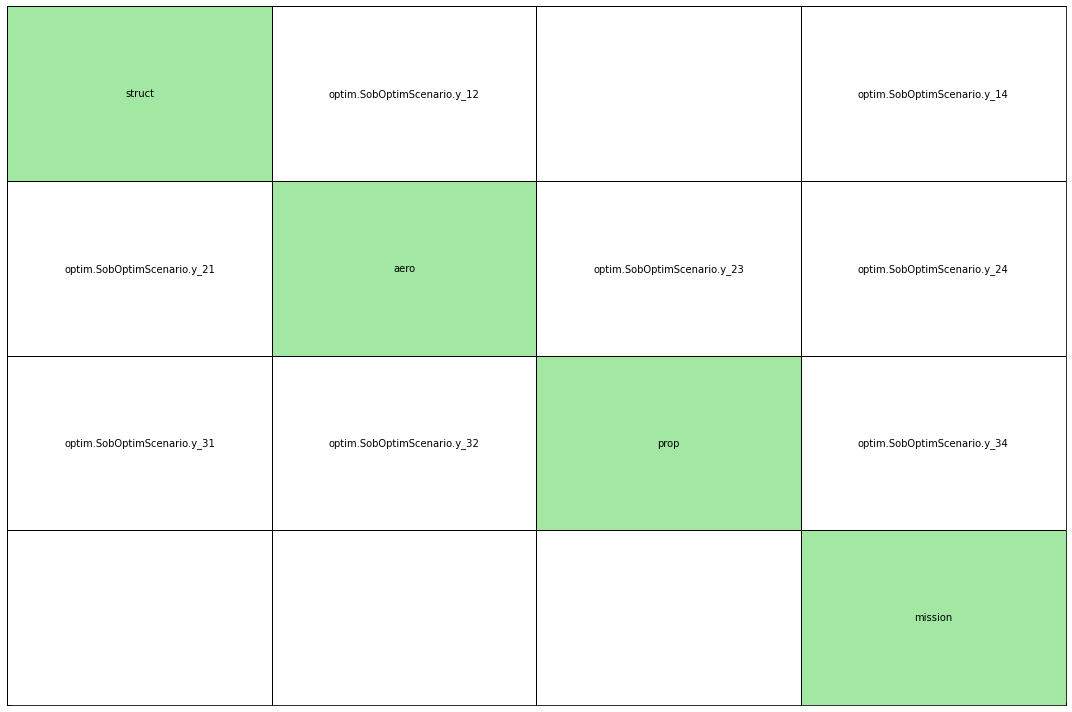

In [65]:
from gemseo.api import generate_n2_plot
generate_n2_plot(disciplines, save=False, show=True)

In [66]:
my_sc_struct.xdsmize(html_output=True, print_statuses=False,open_browser=False,outfilename='sc_struc_xdsm.html')
my_sc_aero.xdsmize(html_output=True, print_statuses=False,open_browser=False,outfilename='sc_aero_xdsm.html')
my_sc_prop.xdsmize(html_output=True, print_statuses=False,open_browser=False,outfilename='sc_prop_xdsm.html')
opt_disc.xdsmize(html_output=True, print_statuses=False,open_browser=False,outfilename='my_xdsm_bi_levels_sob.html')


INFO:gemseo.utils.xdsmizer:Generating HTML XDSM file in : sc_struc_xdsm.html
INFO:gemseo.utils.xdsmizer:Generating HTML XDSM file in : sc_aero_xdsm.html
INFO:gemseo.utils.xdsmizer:Generating HTML XDSM file in : sc_prop_xdsm.html
INFO:gemseo.utils.xdsmizer:Generating HTML XDSM file in : my_xdsm_bi_levels_sob.html


In [67]:
print(my_sc_struct.get_optim_variables_names())
print(my_sc_struct.design_space)
print(my_sc_struct.formulation.opt_problem)

['optim.SobOptimScenario.x_1']
Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.25 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |   1   |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0


In [68]:
print(my_sc_aero.get_optim_variables_names())
print(my_sc_aero.design_space)
print(my_sc_aero.formulation.opt_problem)

['optim.SobOptimScenario.x_2']
Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |   1   |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0


In [69]:
print(my_sc_prop.get_optim_variables_names())
print(my_sc_prop.design_space)
print(my_sc_prop.formulation.opt_problem)

['optim.SobOptimScenario.x_3']
Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     |  0.5  |      1      | float |
+----------------------------+-------------+-------+-------------+-------+
Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0


In [70]:
print(opt_disc.get_optim_variables_names())
print(opt_disc.design_space)
print(opt_disc.formulation.opt_problem)

['optim.SobOptimScenario.z']
Design space:
+--------------------------+-------------+-------+-------------+-------+
| name                     | lower_bound | value | upper_bound | type  |
+--------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.z |     0.01    |  0.05 |     0.09    | float |
| optim.SobOptimScenario.z |    30000    | 45000 |    60000    | float |
| optim.SobOptimScenario.z |     1.4     |  1.6  |     1.8     | float |
| optim.SobOptimScenario.z |     2.5     |  5.5  |     8.5     | float |
| optim.SobOptimScenario.z |      40     |   55  |      70     | float |
| optim.SobOptimScenario.z |     500     |  1000 |     1500    | float |
+--------------------------+-------------+-------+-------------+-------+
Optimization problem:
   Minimize: -optim.SobOptimScenario.y_4(optim.SobOptimScenario.z)
   With respect to: optim.SobOptimScenario.z
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.z) <= 0.0


# 6) Execute

In [71]:
print(exec_eng.execute())

INFO:SoS.EE:PROCESS EXECUTION optim STARTS...
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:SobOptimScenario
   Disciplines: SoSOptimScenario:
Disciplines: struct
MDOFormulation: DisciplinaryOpt
Algorithm: SLSQP
 SoSOptimScenario:
Disciplines: aero
MDOFormulation: DisciplinaryOpt
Algorithm: SLSQP
 SoSOptimScenario:
Disciplines: prop
MDOFormulation: DisciplinaryOpt
Algorithm: SLSQP
 mission
   MDOFormulation: BiLevel
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'normalize_design_space': True, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0.0, 'ctol_abs': 1e-06, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'init_step': 0.25}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_4(optim.SobOptimScenario.z)
   With respect to: optim.SobOptimScenario.z
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOpti

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.035965 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.042994 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.1        0.98571214]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.1        0.98571214]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.15730365527092782
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.02994192 -0.04493466 -0.05393728 -0.05994192 -0.06619637
 -0.17380363]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1         |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.9857121415528541 |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Sc

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1         |     0.4     | 

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.029791 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.43027026]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.43027026]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.553557e+00
INFO:gemseo.mda.mda:	2	1.553558e+00
INFO:gemseo.mda.mda:	3	7.789084e-01
INFO:gemseo.mda.mda:	4	8.245992e-04
INFO:gemseo.mda.mda:	5	6.646528e-06
INFO:gemseo.mda.mda:	6	5.228459e-07
INFO:gemseo.algos.driver_lib:Optimization:   4%|▍         | 2/50 [00:01<00:01, 31.35 it/sec, obj=574]
INFO:gemseo.mda.mda:	1	1.116914e+05
INFO:gemseo.mda.mda:	2	1.116914e+05
INFO:gemseo.mda.mda:	3	5.596685e+04

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   7%|▋         | 2/30 [00:00<00:00, 1304.40 it/sec, obj=1.11]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.1087874739328383
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 12
Constraints values:
   optim.SobOptimScenario.g_3 = [-0.7550343  -0.2449657   0.         -0.05794805]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.4302702621790957 |      1      | float |
+----------------------------+--------

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.4  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_l

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.029899 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
IN

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.4  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_l

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	3.761244e-13
INFO:gemseo.mda.mda:	1	2.934017e-09
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.2871004772038968 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.016611 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.28710048]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.28710048]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.4  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.026347 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.32433991]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.32433991]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	2.003778e+00
INFO:gemseo.mda.mda:	2	2.001814e+00
INFO:gemseo.mda.mda:	3	1.000020e+00
INFO:gemseo.mda.mda:	4	1.102212e-02
INFO:gemseo.mda.mda:	5	9.179593e-03
INFO:gemseo.mda.mda:	6	8.193984e-03
INFO:gemseo.mda.mda:	7	3.425050e-03
INFO:gemseo.mda.mda:	8	1.730654e-03
INFO:gemseo.mda.mda:	9	3.386577e-05
INFO:gemseo.mda.mda:	10	1.525481e-05
INFO:gemseo.mda.mda:	11	6.981089e-06
INFO:gemseo.mda.mda:	12	1.1

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.3243399096607975 |      1      | f

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.016328 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4236.96 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 3.2031565969062648
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = 0.010000000000000009
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.019568 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Ex

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 1248.53 it/sec, obj=0.256]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.25593179755143763
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_1 = [-2.87847241e-02 -1.88000814e-02 -2.52039105e-02 -3.26929762e-02
 -3.92051733e-02 -2.40000000e-01 -1.11022302e-16]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+---

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2842628773086101 |     0.4     | 

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.020330 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.28710048]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.28710048]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.326165e-12
INFO:gemseo.mda.mda:	1	3.636439e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_t

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 3317.49 it/sec, obj=1.12]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.116945619390067
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.18281939e-01 -2.81718061e-01  4.03166389e-12 -1.27460556e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound | 

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  67%|██████▋   | 20/30 [00:00<00:00, 538.95 it/sec, obj=4.01]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 4.005025486816544
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 112
Constraints values:
   optim.SobOptimScenario.g_2 = 0.010000000000000009
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Sc

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.061722 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.30508158 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.30508158 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3050815823005407 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.019415 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.28710048]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.28710048]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	2.795443e-13
INFO:gemseo.mda.mda:	1	8.450121e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_t

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 3849.16 it/sec, obj=1.12]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.116945619390067
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_3 = [-6.70237655e-01 -3.29762345e-01  4.03166389e-12 -1.27460556e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.2871004772050542 |      1      | f

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 4.3464430629265305
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 13
Constraints values:
   optim.SobOptimScenario.g_2 = 0.010000000000000009
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.034443 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.025274 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
IN

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.3794285570111968
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.02211272 -0.02195942 -0.03042617 -0.0382401  -0.04458851 -0.2149137
 -0.0250863 ]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.4  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.025400 ***
INFO:SoS.EE.SoSOptimScenario:Post ru

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.4  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 1578.88 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.37942855701119516
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 =

INFO:gemseo.mda.mda:	2	8.186702e+03
INFO:gemseo.mda.mda:	3	4.168867e+03
INFO:gemseo.mda.mda:	4	1.165598e+02
INFO:gemseo.mda.mda:	5	1.051940e+02
INFO:gemseo.mda.mda:	6	8.592658e+01
INFO:gemseo.mda.mda:	7	5.854595e+01
INFO:gemseo.mda.mda:	8	1.398161e+00
INFO:gemseo.mda.mda:	9	1.109601e+00
INFO:gemseo.mda.mda:	10	9.871071e-01
INFO:gemseo.mda.mda:	11	7.053131e-01
INFO:gemseo.mda.mda:	12	1.769407e-01
INFO:gemseo.mda.mda:	13	1.528916e-02
INFO:gemseo.mda.mda:	14	8.427324e-03
INFO:gemseo.mda.mda:	15	2.922903e-03
INFO:gemseo.mda.mda:	16	6.931742e-04
INFO:gemseo.mda.mda:	17	4.834334e-05
INFO:gemseo.mda.mda:	18	2.301269e-05
INFO:gemseo.mda.mda:	19	6.954877e-06
INFO:gemseo.mda.mda:	20	1.977864e-06
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'f

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  17%|█▋        | 5/30 [00:00<00:00, 902.20 it/sec, obj=1.05]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.048548126425625
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 6
Constraints values:
   optim.SobOptimScenario.g_3 = [-5.38066272e-01 -4.61933728e-01  2.22044605e-16 -1.63702736e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1951603795785728 |      1      | float |
+------------------------

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.032816 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.m

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization: 100%|██████████| 30/30 [00:00<00:00, 598.67 it/sec, obj=4.66]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 4.655052088994545
The result is not feasible.
Status: None
Optimizer message: Maximum number of iterations reached. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 58
Constraints values:
   optim.SobOptimScenario.g_2 = 0.010000000000000009
INFO:gemseo.algos.dr

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
     

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  20%|██        | 6/30 [00:00<00:00, 543.01 it/sec, obj=0.342]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.3415393406352457
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 7
Constraints values:
   optim.SobOptimScenario.g_1 = [-1.49502632e-12 -1.34244817e-02 -2.63525419e-02 -3.60984403e-02
 -4.34244817e-02 -1.66506068e-01 -7.34939321e-02]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |       value       | upper_bound | type  |
+----------------------------+-------------+-------------------+-------------+-------+

INFO:gemseo.mda.mda:	12	6.928413e-06
INFO:gemseo.mda.mda:	13	1.640423e-07
INFO:gemseo.algos.driver_lib:Optimization:  20%|██        | 10/50 [00:10<00:08,  4.84 it/sec, obj=1.37e+3]
INFO:gemseo.mda.mda:	1	1.309015e+04
INFO:gemseo.mda.mda:	2	1.313394e+04
INFO:gemseo.mda.mda:	3	9.205497e+03
INFO:gemseo.mda.mda:	4	6.297282e+03
INFO:gemseo.mda.mda:	5	1.279335e+02
INFO:gemseo.mda.mda:	6	1.280766e+02
INFO:gemseo.mda.mda:	7	6.781737e+01
INFO:gemseo.mda.mda:	8	3.981439e+01
INFO:gemseo.mda.mda:	9	1.748703e+00
INFO:gemseo.mda.mda:	10	1.732490e+00
INFO:gemseo.mda.mda:	11	9.434145e-01
INFO:gemseo.mda.mda:	12	5.752228e-01
INFO:gemseo.mda.mda:	13	2.355153e-02
INFO:gemseo.mda.mda:	14	2.343856e-02
INFO:gemseo.mda.mda:	15	1.257649e-02
INFO:gemseo.mda.mda:	16	7.390575e-03
INFO:gemseo.mda.mda:	17	3.253106e-04
INFO:gemseo.mda.mda:	18	3.214140e-04
INFO:gemseo.mda.mda:	19	1.856518e-04
INFO:gemseo.mda.mda:	20	1.184224e-04
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario exe

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |       value       | upper_bound | type  |
+----------------------------+-------------+-------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.228085437002575 |      1      | float |
+----------------------------+-------------+-------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 3709.48 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.0869624669965374
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.08399392e-0

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |  

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.018893 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.m

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1000000003703741 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.8935714309792221 |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.044664 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.1        0.89357143]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.1        0.89357143]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimS

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  13%|█▎        | 4/30 [00:00<00:00, 880.24 it/sec, obj=0.27]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.27003621603151473
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 5
Constraints values:
   optim.SobOptimScenario.g_1 = [ 3.14109953e-07 -2.35046058e-02 -3.76927600e-02 -4.69850747e-02
 -5.35047105e-02 -1.16193040e-01 -1.23806960e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-----

INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| opti

INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4237.67 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 10.151960003915615
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.02635942263173585
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.019461 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.034768 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.1        0.96363287]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.1        0.96363287]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.2084112482728769
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 8
Constraints values:
   optim.SobOptimScenario.g_1 = [-2.22044605e-16 -2.22677392e-02 -3.63012066e-02 -4.56491583e-02
 -5.22677392e-02 -1.27160216e-01 -1.12839784e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1         |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.9636328742841472 |     1.25    | float |
+----------------------------+-----

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.016908 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.m

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.024498 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.1        0.89298185]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.1        0.89298185]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.2836042767751269
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.02194895 -0.03594257 -0.04530486 -0.05194895 -0.12742367
 -0.11257633]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1         |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.8929818512663295 |     1.25    | float |
+----------------------------+-------------+-------------------

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1         |     0.4     | 

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.030842 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.16083383]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.16083383]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.528420e+00
INFO:gemseo.mda.mda:	2	1.528420e+00
INFO:gemseo.mda.mda:	3	7.675814e-01
INFO:gemseo.mda.mda:	4	1.030228e-03
INFO:gemseo.mda.mda:	5	7.367272e-06
INFO:gemseo.mda.mda:	6	1.405609e-06
INFO:gemseo.mda.mda:	7	2.018194e-09
INFO:gemseo.algos.driver_lib:Optimization:  28%|██▊       | 14/50 [00:14<00:10,  3.46 it/sec, obj=2.41e+3]
INFO:gemseo.mda.mda:	1	1.431188e+04
INFO:gemseo.mda.mda:	2	1.43118

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1608338260240683 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   7%|▋         | 2/30 [00:00<00:00, 2500.08 it/sec, obj=0.949]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9492637470663685
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 3
Constraints values:
   optim.SobOptimScenario.g_3 =

INFO:gemseo.mda.mda:	1	2.625222e-12
INFO:gemseo.mda.mda:	1	1.372978e-07
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+------------

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  20%|██        | 6/30 [00:00<00:00, 563.24 it/sec, obj=0.181]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.1811367049505827
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 7
Constraints values:
   optim.SobOptimScenario.g_1 = [-7.61612995e-14 -2.09273033e-02 -3.47932162e-02 -4.42014875e-02
 -5.09273033e-02 -1.33323247e-01 -1.06676753e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-----

INFO:gemseo.mda.mda:	3	6.203940e+04
INFO:gemseo.mda.mda:	4	1.058958e+03
INFO:gemseo.mda.mda:	5	2.282896e+01
INFO:gemseo.mda.mda:	6	1.079899e+01
INFO:gemseo.mda.mda:	7	1.046718e-01
INFO:gemseo.mda.mda:	8	1.385915e-03
INFO:gemseo.mda.mda:	9	1.221342e-05
INFO:gemseo.mda.mda:	10	1.899382e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOpti

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1658264780628957 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.016721 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.16582648]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.16582648]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |       value       | upper_bound | type  |
+----------------------------+-------------+-------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1        |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 1.006411161815095 |     1.25    | float |
+----------------------------+-------------+-------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2292.85 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.16766728681117368
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function

INFO:gemseo.mda.mda:	1	1.250106e-12
INFO:gemseo.mda.mda:	1	2.356081e+04
INFO:gemseo.mda.mda:	2	2.358264e+04
INFO:gemseo.mda.mda:	3	1.193503e+04
INFO:gemseo.mda.mda:	4	2.378968e+02
INFO:gemseo.mda.mda:	5	2.308625e+02
INFO:gemseo.mda.mda:	6	1.863466e+02
INFO:gemseo.mda.mda:	7	1.405125e+02
INFO:gemseo.mda.mda:	8	1.191171e+00
INFO:gemseo.mda.mda:	9	3.815942e-03
INFO:gemseo.mda.mda:	10	3.288693e-05
INFO:gemseo.mda.mda:	11	3.496877e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect 

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9604122451106479
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 7
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.73979380e-01 -2.26020620e-01  2.87769808e-13 -1.79125263e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1651287163587237 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.029271 ***


INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound | 

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.28000959064149533
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [ 2.22044605e-16 -2.21016225e-02 -3.61143253e-02 -4.54697523e-02
 -5.21016225e-02 -1.27006596e-01 -1.12993404e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1         |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.9012146834143706 |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   7%|▋         | 2/30 [00:00<00:00, 1291.95 it/sec, obj=0.528]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5277039170228061
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 3
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.017965   -0.03146063 -0.0410022  -0.047965   -0.13324639
 -0.10675361]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |       value       | upper_bound | type  |
+----------------------------+-------------+-------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.247112410765435 |     0.4     | float |
| opt

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |       value       | upper_bound | type  |
+----------------------------+-------------+-------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.247112410765435 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75       |     1.25    | float |
+----------------------------+-------------+-------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optim

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.024935 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.24711241 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.24711241 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |       value       | upper_bound | type  |
+----------------------------+-------------+-------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.247112410765435 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75       |     1.25    | float |
+----------------------------+-------------+-------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  20%|██        | 6/30 [00:00<00:00, 360.14 it/sec, obj=0.537]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5366358045590212
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective

INFO:gemseo.mda.mda:	1	1.392813e+00
INFO:gemseo.mda.mda:	2	1.397749e+00
INFO:gemseo.mda.mda:	3	7.014351e-01
INFO:gemseo.mda.mda:	4	1.838933e-02
INFO:gemseo.mda.mda:	5	1.458382e-02
INFO:gemseo.mda.mda:	6	1.330165e-02
INFO:gemseo.mda.mda:	7	2.231905e-03
INFO:gemseo.mda.mda:	8	1.723131e-03
INFO:gemseo.mda.mda:	9	4.904609e-05
INFO:gemseo.mda.mda:	10	1.258710e-05
INFO:gemseo.mda.mda:	11	7.189304e-06
INFO:gemseo.mda.mda:	12	8.093333e-07
INFO:gemseo.algos.driver_lib:Optimization:  36%|███▌      | 18/50 [00:18<00:11,  2.74 it/sec, obj=2.86e+3]
INFO:gemseo.mda.mda:	1	6.962097e+03
INFO:gemseo.mda.mda:	2	6.984804e+03
INFO:gemseo.mda.mda:	3	5.161136e+03
INFO:gemseo.mda.mda:	4	3.421007e+03
INFO:gemseo.mda.mda:	5	9.104694e+01
INFO:gemseo.mda.mda:	6	7.144297e+01
INFO:gemseo.mda.mda:	7	5.743054e+01
INFO:gemseo.mda.mda:	8	4.362911e+01
INFO:gemseo.mda.mda:	9	1.758183e+01
INFO:gemseo.mda.mda:	10	1.516259e+00
INFO:gemseo.mda.mda:	11	9.394257e-01
INFO:gemseo.mda.mda:	12	1.896413e-02
INFO:gemseo.mda.mda:	13

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 3329.34 it/sec, obj=1.05]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.0450054484021163
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.39723000e-01 -2.60277000e-01  2.43804976e-13 -1.65825973e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1956807411792081 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:ge

INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      o

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4936.80 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 5.95920017241689
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.011396962693407842
INFO:gemseo.algos.driver_lib:Design space:
+-----------

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.035355 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.2407235 0.75     ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.2407235 0.75     ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_des

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5158064907493218
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 3
Constraints values:
   optim.SobOptimScenario.g_1 = [ 2.22044605e-16 -1.79441077e-02 -3.14371212e-02 -4.09796363e-02
 -4.79441077e-02 -1.27942016e-01 -1.12057984e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2407235034084003 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.c

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.080662 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.29026037 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.29026037 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2902603675828264 |     0.4     | 

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.021835 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.17398371]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.17398371]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	6.693873e-12
INFO:gemseo.mda.mda:	1	4.407693e-07
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_t

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4310.84 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.0067808957193334
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.33308835e-01 -2.66691165e-01 -1.11022302e-16 -1.67810552e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1739837105176012 |      1      | float |
+----------------------------+---

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1739837105176012 |      1      | f

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.017749 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.m

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.mda:	1	1.041755e-14
INFO:gemseo.mda.mda:	1	3.588814e-10
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraint

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  17%|█▋        | 5/30 [00:00<00:00, 635.30 it/sec, obj=0.449]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.4490663857415069
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 6
Constraints values:
   optim.SobOptimScenario.g_1 = [ 2.22044605e-16 -1.78855976e-02 -3.13712973e-02 -4.09164454e-02
 -4.78855976e-02 -1.37459764e-01 -1.02540236e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-----

INFO:gemseo.mda.mda:	5	1.541662e+00
INFO:gemseo.mda.mda:	6	1.594449e-01
INFO:gemseo.mda.mda:	7	1.906189e-02
INFO:gemseo.mda.mda:	8	4.160164e-04
INFO:gemseo.mda.mda:	9	2.083230e-06
INFO:gemseo.mda.mda:	10	1.609839e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimSce

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1817974396905722 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.018957 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.18179744]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.18179744]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2545571407991653 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 1763.70 it/sec, obj=0.458]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.4584710159509179
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_re

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.082073 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.3191922 0.75     ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.3191922 0.75     ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_des

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 1107.84 it/sec, obj=0.497]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.49716313912791926
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.01769718 -0.03115932 -0.04071295 -0.04769718 -0.12000224
 -0.11999776]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenar

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3191922033499331 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.021940 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.3191922 0.75     ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.3191922 0.75     ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_des

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2484.73 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.520434577709353
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [ 3.10862447e-15 -1.56887927e-02 -2.88998918e-02 -3.85438961e-02
 -4.56887927e-02 -1.64378573e-01 -7.56214266e-02]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2932214143252099 |     0.4

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2932214143252099 |     0.4     | 

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.024838 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.19360611]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.19360611]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	2.131090e-12
INFO:gemseo.mda.mda:	1	2.260350e-07
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_t

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 2386.34 it/sec, obj=1.03]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.0345551123683325
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.37236070e-01 -2.62763930e-01  6.55253629e-13 -1.69597332e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound | 

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 3116.05 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.172584259082146
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.03532146269748759
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run termi

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.027325 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.11102739 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.11102739 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 5885.37 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.825815726259123
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.04549659183115884
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run termi

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
     

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1815135114175445 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.021740 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.18151351 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.18151351 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimS

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1815135114175445 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.024504 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.16141302]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.16141302]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	4.375614e-01
INFO:gemseo.mda.mda:	2	4.375614e-01
INFO:gemseo.mda.mda:	3	2.200451e-01
INFO:gemseo.mda.mda:	4	2.275221e-04
INFO:gemseo.mda.mda:	5	1.182261e-06
INFO:gemseo.mda.mda:	6	9.212453e-08
INFO:gemseo.algos.driver_lib:Optimization:  54%|█████▍    | 27/50 [00:26<00:12,  1.88 it/sec, obj=3.04e+3]
INFO:gemseo.mda.mda:	1	2.156829e+03
INFO:gemseo.mda.mda:	2	2.156829e+03
INFO:gemseo.mda.mda:	3	1.53401

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1614130184684605 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 5000.16 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9396240618157061
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_3 = [-8.140379

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.028190 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.18750943 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.18750943 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 5000.56 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.414018701311712
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.06754593129666853
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run termi

INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.13101655 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to co

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1310165504883374 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.028179 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.13101655 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.13101655 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimS

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4996.99 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.360895471038905
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.06754593129666853
INFO:gemseo.algos.driver_lib:Design space:
+-----------

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.089133 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.23005683 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.23005683 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   7%|▋         | 2/30 [00:00<00:00, 1237.70 it/sec, obj=0.48]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.48030417354692395
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 3
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.00990134 -0.02238901 -0.03229345 -0.03990134 -0.10256616
 -0.13743384]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2300568314106642 |     0.4     | float |
|

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2300568314106642 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.16847943]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.616804e-11
INFO:gemseo.mda.mda:	1	7.367391e-07
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1684794325471333 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.022014 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.16847943]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.16847943]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1684794325471333 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:ge

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.020100 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.m

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1420446898857927 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 1891.94 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.47399691630075014
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective fu

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.080312 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.20487397 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.20487397 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2321.57 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5239804443978079
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [ 5.55111512e-15 -9.08521203e-03 -2.14708635e-02 -3.14120290e-02
 -3.90852120e-02 -1.00282095e-01 -1.39717905e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2048739749027657 |     0.

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2048739749027657 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.019301 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.m

INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| opti

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.029204 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.12011137 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.12011137 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 1149.59 it/sec, obj=0.48]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.4800610736531161
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.00094441 -0.01231247 -0.02261997 -0.03094441 -0.09031137
 -0.14968863]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1201113673401102 |     0.4     | float |
| optim.SobOptim

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 1150.72 it/sec, obj=0.485]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.4851639760529153
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_1 = [-2.77136810e-03 -2.22044605e-16 -1.05571580e-02 -2.07131622e-02
 -2.90762106e-02 -9.33876733e-02 -1.46612327e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1683026254473017 |     0.4     | float |
| optim.SobOptimS

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1683026254473017 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1908623011803453 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.071388 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.1908623 0.75     ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.1908623 0.75     ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScena

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1908623011803453 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15624475]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15624475]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.041755e-14
INFO:gemseo.mda.mda:	1	5.166775e-11
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Mini

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.0436940722811
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.03881498559201457
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.015876 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:S

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1562447456463121 |      1      | f

INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4092.67 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.088387111024359
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.03686503429780541
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.017120 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executi

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2196331631289917 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.031049 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.16031728]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.16031728]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	2.549479e-01
INFO:gemseo.mda.mda:	2	2.549480e-01
INFO:gemseo.mda.mda:	3	1.284001e-01
INFO:gemseo.mda.mda:	4	1.153483e-04
INFO:gemseo.mda.mda:	5	4.728178e-07
INFO:gemseo.algos.driver_lib:Optimization:  72%|███████▏  | 36/50 [00:33<00:09,  1.48 it/sec, obj=3.37e+3]
INFO:gemseo.mda.mda:	1	1.246763e+03
INFO:gemseo.mda.mda:	2	1.246763e+03
INFO:gemseo.mda.mda:	3	8.532158e+02
INFO:gemseo.mda.mda:	4	5.43763

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |       value       | upper_bound | type  |
+----------------------------+-------------+-------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.160317279186934 |      1      | float |
+----------------------------+-------------+-------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 2707.52 it/sec, obj=0.938]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9383837339731386
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the opt

INFO:gemseo.mda.mda:	1	1.041755e-14
INFO:gemseo.mda.mda:	1	5.128879e-10
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+------------

INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  20%|██        | 6/30 [00:00<00:00, 571.74 it/sec, obj=0.489]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.4885931073177641
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 7
Constraints values:
   optim.SobOptimScenario.g_1 = [ 5.10702591e-15 -8.84766303e-03 -2.12036209e-02 -3.11554761e-02
 -3.88476630e-02 -9.35530546e-02 -1.46446945e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1193103163475005 |     0.4   

INFO:gemseo.mda.mda:	8	1.652136e-03
INFO:gemseo.mda.mda:	9	1.430825e-04
INFO:gemseo.mda.mda:	10	4.255339e-06
INFO:gemseo.mda.mda:	11	1.230734e-09
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |       value       | upper_bound | type  |
+----------------------------+-------------+-------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.158839175068307 |      1      | float |
+----------------------------+-------------+-------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.017092 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15883918]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15883918]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, opti

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.046603 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.19315686 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.19315686 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.514995312466588
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.00857945 -0.02090188 -0.0308658  -0.03857945 -0.09911014
 -0.14088986]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.193156859350521  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.7500000000000002 |     1.25    | float |
+----------------------------+-------------+--------------------

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.019725 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4241.10 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.05267548149338
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.03727806662362565
INFO:gemseo.algos.driver_lib:Design space:
+------------

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.017276 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.mda:	1	1.041755e-14
INFO:gemseo.mda.mda:	1	5.755127e+03
INFO:gemseo.mda.mda:	2	6.110756e+03
INFO:gemseo.mda.mda:	3	3.351224e+03
INFO:gemseo.mda.mda:	4	1.078446e+03
INFO:gemseo.mda.mda:	5	8.205711e+02
INFO:gemseo.mda.mda:	6	5.592124e+02
INFO:gemseo.mda.mda:	7	4.133551e+02
INFO:gemseo.mda.mda:	8	5.772942e-01
INFO:gemseo.mda.mda:	9	1.058948e-03
INFO:gemseo.mda.mda:	10	2.203670e-05
INFO:gemseo.mda.mda:	11	6.574008e-09
IN

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  13%|█▎        | 4/30 [00:00<00:00, 2123.12 it/sec, obj=0.942]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.942182469631581
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 5
Constraints values:
   optim.SobOptimScenario.g_3 = [-8.24120609e-01 -1.75879391e-01  3.73923115e-13 -1.80241558e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4237.38 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.048264062950356
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.0367698204694078
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run termin

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
     

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2273635634011326 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.7500000000000001 |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.034345 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.22736356 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.22736356 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimS

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4281.65 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.067518915034315
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.0367698204694078
INFO:gemseo.algos.driver_lib:Design space:
+------------

INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      o

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4991.44 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.997574676561795
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.04492873476521175
INFO:gemseo.algos.driver_lib:Design space:
+-----------

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.020901 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4991.04 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.971673140447616
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.035942739480052444
INFO:gemseo.algos.driver_lib:Design space:
+----------

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.039073 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.22470569 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.22470569 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5003699364695818
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [-2.22044605e-16 -6.18512714e-03 -1.82082680e-02 -2.82799373e-02
 -3.61851271e-02 -1.00256188e-01 -1.39743812e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2247056912559846 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.c

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.018016 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4936.60 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.774246658575052
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.02226047730876224
INFO:gemseo.algos.driver_lib:Design space:
+-----------

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.030294 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.25568603 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.25568603 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 3332.43 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.597955294729617
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.02384582013065173
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run termi

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
     

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.017765 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.md

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2419198950487187 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  20%|██        | 6/30 [00:00<00:00, 585.45 it/sec, obj=0.54]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5398530199470528
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel 

INFO:gemseo.mda.mda:	1	7.488278e-01
INFO:gemseo.mda.mda:	2	7.488279e-01
INFO:gemseo.mda.mda:	3	3.768542e-01
INFO:gemseo.mda.mda:	4	4.919176e-04
INFO:gemseo.mda.mda:	5	3.262865e-06
INFO:gemseo.mda.mda:	6	2.566402e-07
INFO:gemseo.algos.driver_lib:Optimization:  92%|█████████▏| 46/50 [00:41<00:03,  1.20 it/sec, obj=3.71e+3]
INFO:gemseo.mda.mda:	1	3.679090e+03
INFO:gemseo.mda.mda:	2	3.679090e+03
INFO:gemseo.mda.mda:	3	2.584352e+03
INFO:gemseo.mda.mda:	4	1.633233e+03
INFO:gemseo.mda.mda:	5	2.575410e+00
INFO:gemseo.mda.mda:	6	6.180929e-02
INFO:gemseo.mda.mda:	7	3.849187e-04
INFO:gemseo.mda.mda:	8	2.814453e-06
INFO:gemseo.mda.mda:	9	9.926433e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_t

INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 5999.86 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9239330847903853
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.91545748e-01 -2.08454252e-01  9.46576151e-13 -1.83255000e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1562447456464354 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scen

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1562447456464354 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:ge

INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.mda:	1	1.041755e-14
INFO:gemseo.mda.mda:	1	3.062402e+03
INFO:gemseo.mda.mda:	2	3.741784e+03
INFO:gemseo.mda.mda:	3	2.525907e+03
INFO:gemseo.mda.mda:	4	1.233514e+03
INFO:gemseo.mda.mda:	5	9.933030e+02
INFO:gemseo.mda.mda:	6	6.811559e+02
INFO:gemseo.mda.mda:	7	1.862618e+02
INFO:gemseo.mda.mda:	8	3.640362e-01
INFO:gemseo.mda.mda:	9	2.177024e-03
INFO:gemseo.mda.mda:	10	6.000555e-05
INFO:gemseo.mda.mda:	11	2.261325e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario e

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  13%|█▎        | 4/30 [00:00<00:00, 2138.13 it/sec, obj=0.944]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9435264921251463
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 5
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.93659237e-01 -2.06340763e-01 -2.22044605e-16 -1.83122801e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     |

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound | 

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.018064 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.md

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2461227271871274 |     0.4     | 

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.025332 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.16636789]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.16636789]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	3.028516e-01
INFO:gemseo.mda.mda:	2	3.032483e-01
INFO:gemseo.mda.mda:	3	1.519928e-01
INFO:gemseo.mda.mda:	4	8.753243e-04
INFO:gemseo.mda.mda:	5	8.585487e-04
INFO:gemseo.mda.mda:	6	6.611710e-04
INFO:gemseo.mda.mda:	7	4.461156e-04
INFO:gemseo.mda.mda:	8	4.671452e-07
INFO:gemseo.algos.driver_lib:Optimization:  96%|█████████▌| 48/50 [00:43<00:01,  1.15 it/sec, obj=3.48e+3]
INFO:gemseo.mda.mda:	1	1.73593

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1663678858208456 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:ge

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.018751 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.mda:	1	0.000000e+00
INFO:gemseo.mda.mda:	1	5.126877e-11
INFO:gemseo.mda.mda:	1	0.000000e+00
INFO:gemseo.mda.mda:	1	4.398429e+03
INFO:gemseo.mda.mda:	2	5.282451e+03
INFO:gemseo.mda.mda:	3	3.387709e+03
INFO:gemseo.mda.mda:	4	2.586345e+03
INFO:gemseo.mda.mda:	5	1.649411e+03
INFO:gemseo.mda.mda:	6	6.747688e+02
INFO:gemseo.mda.mda:	7	1.082493e+02
INFO:gemseo.mda.mda:	8	1.003463e+00
INFO:gemseo.mda.mda:	9	6.227071e-04
INFO

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1663678858208456 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  20%|██        | 6/30 [00:00<00:00, 1751.67 it/sec, obj=0.944]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9442846800424156
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by th

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.018750 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4285.15 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.733736188140953
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.003991226545110305
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run term

INFO:gemseo.mda.mda:	7	9.482510e+01
INFO:gemseo.mda.mda:	8	9.048667e-02
INFO:gemseo.mda.mda:	9	2.317170e-04
INFO:gemseo.mda.mda:	10	5.666742e-07
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_l

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9398942051466725
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 5
Constraints values:
   optim.SobOptimScenario.g_3 = [-8.00461716e-01 -1.99538284e-01  2.97539771e-13 -1.83147121e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1614405090062574 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.026365 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptim

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound | 

INFO:gemseo.mda.mda:	1	5.492706e+03
INFO:gemseo.mda.mda:	2	5.597299e+03
INFO:gemseo.mda.mda:	3	3.006627e+03
INFO:gemseo.mda.mda:	4	3.449664e+02
INFO:gemseo.mda.mda:	5	3.256485e+02
INFO:gemseo.mda.mda:	6	2.184289e+02
INFO:gemseo.mda.mda:	7	1.115711e+02
INFO:gemseo.mda.mda:	8	1.301289e-01
INFO:gemseo.mda.mda:	9	2.087302e-02
INFO:gemseo.mda.mda:	10	1.491972e-05
INFO:gemseo.mda.mda:	11	2.066153e-07
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Su

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1562447456465283 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.031655 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15624475]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15624475]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1562447456465283 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 5001.36 it/sec]
INFO:gemseo.algos.driv

INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.mda:	1	1.458457e-13
INFO:gemseo.mda.mda:	1	5.895922e-09
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -

{'optim.SobOptimScenario.max_iter': array([50]), 'optim.SobOptimScenario.ineq_constraints': [1, 1, 1], 'optim.SobOptimScenario.eq_constraints': [], 'optim.SobOptimScenario.algo': 1, 'optim.SobOptimScenario.design_space': array(['z', 'x_1', 'x_2', 'x_3', 'y_14', 'y_32', 'y_31', 'y_24', 'y_34',
       'y_23', 'y_21', 'y_12',
       list([0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0]), list([0.25, 1.0]),
       list([1.0]), list([0.5]), list([50606.9741711, 7306.20262124]),
       list([0.50279625]), list([6354.32430691]), list([4.15006276]),
       list([1.10754577]), list([12194.2671934]), list([50606.9741711]),
       list([50606.9742, 0.95]),
       list([0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]), list([0.1, 0.75]),
       list([0.75]), list([0.1]), list([24850.0, -7700.0]), list([0.235]),
       list([2960.0]), list([0.44]), list([0.44]), list([3365.0]),
       list([24850.0]), list([24850.0, 0.45]),
       list([0.09, 60000.0, 1.8, 8.5, 70.0, 1500.0]), list([0.4, 1.25]),
       list([1.25]), 

# 7) Explore results

In [72]:
# retrieve discipline to check the result...
opt_disc = exec_eng.dm.get_disciplines_with_name("optim." + sc_name)[0]

In [73]:
opt_disc.get_disc_full_name()

'optim.SobOptimScenario'

In [74]:
DESC_IN = opt_disc.DESC_IN
DESC_OUT = opt_disc.DESC_OUT
DESC_IN_df = pd.DataFrame.from_dict(DESC_IN,orient='index')
DESC_OUT_df = pd.DataFrame.from_dict(DESC_OUT,orient='index')

In [75]:
DESC_IN_df

,type,default,structuring,possible_values,dataframe_descriptor,dataframe_edition_locked
max_iter,float,NaN,NaN,NaN,NaN,NaN
ineq_constraints,string_list,[],True,NaN,NaN,NaN
eq_constraints,string_list,[],True,NaN,NaN,NaN
algo,string,NaN,True,NaN,NaN,NaN
design_space,dataframe,NaN,True,NaN,NaN,NaN
formulation,string,NaN,True,NaN,NaN,NaN
maximize_objective,bool,False,True,NaN,NaN,NaN
objective_name,string,NaN,True,NaN,NaN,NaN
differentiation_method,string,finite_differences,True,"[user, finite_differences, complex_step]",NaN,NaN
algo_options,dict,NaN,True,NaN,"{'variable': ('string', None, False), 'value':...",False


In [76]:
DESC_OUT_df

,type
design_space_out,dataframe


In [77]:
opt_disc.get_data_io_dict('in')['formulation']['value']

'BiLevel'

In [78]:
opt_disc.get_data_io_dict('in')['algo']['value']

'NLOPT_COBYLA'

In [79]:
opt_disc.get_data_io_dict('in')['objective_name']['value']

'y_4'

In [80]:
opt_disc.optimization_result.f_opt

3706.676391338519

In [81]:
opt_disc.optimization_result.x_opt

array([5.45358130e-02, 6.00000000e+04, 1.40000000e+00, 2.50000000e+00,
       6.93378741e+01, 1.50000000e+03])

In [82]:
opt_disc._post_run()

INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [5.45358130e-02 6.00000000e+04 1.40000000e+00 2.50000000e+00
 6.93378741e+01 1.50000000e+03]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [5.45358130e-02 6.00000000e+04 1.40000000e+00 2.50000000e+00
 6.93378741e+01 1.50000000e+03]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.z) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.z) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.z) <= 0.0, -optim.SobOptimScenario.y_4(optim.SobOptimScenario.z)]
INFO:gemseo.mda.mda:	1	7.177627e-10
INFO:gemseo.mda.mda:	1	2.083510e-14
INFO:gemseo.mda.mda:	1	7.177627e-10
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel':

INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 1064.44 it/sec, obj=0.532]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5320781643667047
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_1 = [ 1.77635684e-15 -1.48689639e-02 -2.79775844e-02 -3.76584810e-02
 -4.48689639e-02 -1.10062720e-01 -1.29937280e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2528770291779421 |     0.4     | float |
| optim.SobOptimS

In [83]:
opt_disc.get_data_io_dict('out')['design_space_out']['value'] 

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,z,"[0.05453581303674309, 60000.0, 1.4, 2.5, 69.33...","[0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]","[0.09, 60000.0, 1.8, 8.5, 70.0, 1500.0]",True,"[True, True, True, True, True, True]"
1,x_1,"[0.25, 1.0]","[0.1, 0.75]","[0.4, 1.25]",True,"[True, True]"
2,x_2,[1.0],[0.75],[1.25],True,[True]
3,x_3,[0.5],[0.1],[1.0],True,[True]
0,y_14,"[50606.9741711, 7306.20262124]","[24850.0, -7700.0]","[77100.0, 45000.0]",True,"[True, True]"
1,y_32,[0.50279625],[0.235],[0.795],True,[True]
2,y_31,[6354.32430691],[2960.0],[10185.0],True,[True]
3,y_24,[4.15006276],[0.44],[11.13],True,[True]
4,y_34,[1.10754577],[0.44],[1.98],True,[True]
5,y_23,[12194.2671934],[3365.0],[26400.0],True,[True]


# 7 gemseo post treatment

In [84]:
opt_results = opt_disc.get_optimum()
opt_results

Optimization result:
   Design variables: [5.45358130e-02 6.00000000e+04 1.40000000e+00 2.50000000e+00
 6.93378741e+01 1.50000000e+03]
   Objective function: 3706.676391338519
   Feasible solution: True

In [85]:
print("The solution of P is (x*,f(x*)) = ({}, {})".format(opt_results.x_opt,
                                                          opt_results.f_opt))
print(opt_results)
print(opt_disc.optimization_result)

The solution of P is (x*,f(x*)) = ([5.45358130e-02 6.00000000e+04 1.40000000e+00 2.50000000e+00
 6.93378741e+01 1.50000000e+03], 3706.676391338519)
Optimization result:
Objective value = 3706.676391338519
The result is feasible.
Status: None
Optimizer message: Maximum number of iterations reached. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 52
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.01486896 -0.02797758 -0.03765848 -0.04486896 -0.11006272
 -0.12993728]
   optim.SobOptimScenario.g_2 = -0.021856747853027603
   optim.SobOptimScenario.g_3 = [-7.91545748e-01 -2.08454252e-01  9.46576151e-13 -1.83255000e-01]
Optimization result:
Objective value = 3706.676391338519
The result is feasible.
Status: None
Optimizer message: Maximum number of iterations reached. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 52
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.01486896 -0.0

In [86]:
opt_problem = opt_disc.formulation.opt_problem
dataset = opt_problem.export_to_dataset("dataset_name")

In [87]:
print(dataset)

dataset_name
   Number of samples: 50
   Number of variables: 5
   Variables names and sizes by group:
      design_parameters: optim.SobOptimScenario.z (6)
      functions: optim.SobOptimScenario.g_1 (7), optim.SobOptimScenario.g_2 (1), -optim.SobOptimScenario.y_4 (1), optim.SobOptimScenario.g_3 (4)
   Number of dimensions (total = 19) by group:
      design_parameters: 6
      functions: 13


In [88]:
XY_pd=dataset.export_to_dataframe()
XY_pd

design_parameters                                               \
   optim.SobOptimScenario.z                                                
                          0             1         2         3          4   
0                  0.050000  45000.000000  1.600000  5.500000  55.000000   
1                  0.070000  45000.000000  1.600000  5.500000  55.000000   
2                  0.070000  52500.000000  1.600000  5.500000  55.000000   
3                  0.070000  52500.000000  1.700000  5.500000  55.000000   
4                  0.070000  52500.000000  1.600000  7.000000  55.000000   
5                  0.070000  52500.000000  1.600000  5.500000  62.500000   
6                  0.070000  52500.000000  1.600000  5.500000  62.500000   
7                  0.066000  56510.025718  1.567379  4.427044  61.219427   
8                  0.066402  58251.438558  1.538718  5.607755  57.553813   
9                  0.059124  55944.202460  1.567379  4.478897  61.219427   
10                 0.054334  60000.000000  1.522785  4.353731  65.194462   
11                 0.053410  60000.000000  1.580315  4.750607  70.000000   
12                 0.054831  59638.854547  1.514835  4.339870  64.962465   
13                 0.054385  60000.000000  1.431930  4.362268  69.119137   
14                 0.052660  60000.000000  1.463860  5.209563  70.000000   
15                 0.054660  59347.646291  1.431157  4.310792  69.166434   
16                 0.057631  58288.784763  1.462314  2.929062  70.000000   
17                 0.058628  57881.001964  1.524627  2.500000  70.000000   
18                 0.057151  55914.718234  1.462852  2.912634  69.892224   
19                 0.059687  60000.000000  1.511267  3.358125  70.000000   
20                 0.057613  59603.396293  1.462895  2.903491  69.777923   
21                 0.057976  60000.000000  1.552477  3.306981  70.000000   
22                 0.056233  57946.377295  1.464935  2.569486  67.993121   
23                 0.059606  57513.875396  1.499074  3.306981  70.000000   
24                 0.051170  59420.042329  1.460500  2.902985  69.865087   
25                 0.048626  60000.000000  1.400000  2.500000  68.224279   
26                 0.048796  59182.362663  1.400294  2.571517  66.928562   
27                 0.043114  58397.363609  1.401846  2.510915  68.471935   
28                 0.052349  58292.294416  1.405248  2.528750  66.541854   
29                 0.047742  59531.556468  1.407718  2.583787  67.521333   
30                 0.051917  60000.000000  1.400000  2.500000  70.000000   
31                 0.048592  59947.301600  1.408051  2.672171  68.239975   
32                 0.048189  59979.214176  1.407467  2.528831  68.251922   
33                 0.050296  60000.000000  1.400000  2.500000  70.000000   
34                 0.050784  59847.805923  1.400508  2.511627  69.983262   
35                 0.051345  59468.483766  1.405444  2.565325  69.852600   
36                 0.051284  59689.849908  1.404983  2.800611  69.664457   
37                 0.051667  59302.826805  1.403366  2.533920  69.713208   
38                 0.050680  59808.650789  1.400648  2.537100  69.865101   
39                 0.052980  60000.000000  1.422847  2.523253  70.000000   
40                 0.050808  59828.768561  1.401712  2.506732  69.440866   
41                 0.048768  60000.000000  1.401015  2.523253  70.000000   
42                 0.051014  59496.546568  1.401558  2.500925  69.727073   
43                 0.054435  59190.118901  1.401015  2.500000  70.000000   
44                 0.054039  58636.807196  1.401095  2.513732  69.959332   
45                 0.054536  60000.000000  1.400000  2.500000  69.337874   
46                 0.054479  59000.142694  1.401015  2.532556  69.562786   
47                 0.058767  58459.823149  1.400000  2.500000  69.489866   
48                 0.059002  58914.864021  1.400000  2.500000  70.000000   
49                 0.054454  59190.525259  1.400829  2.576

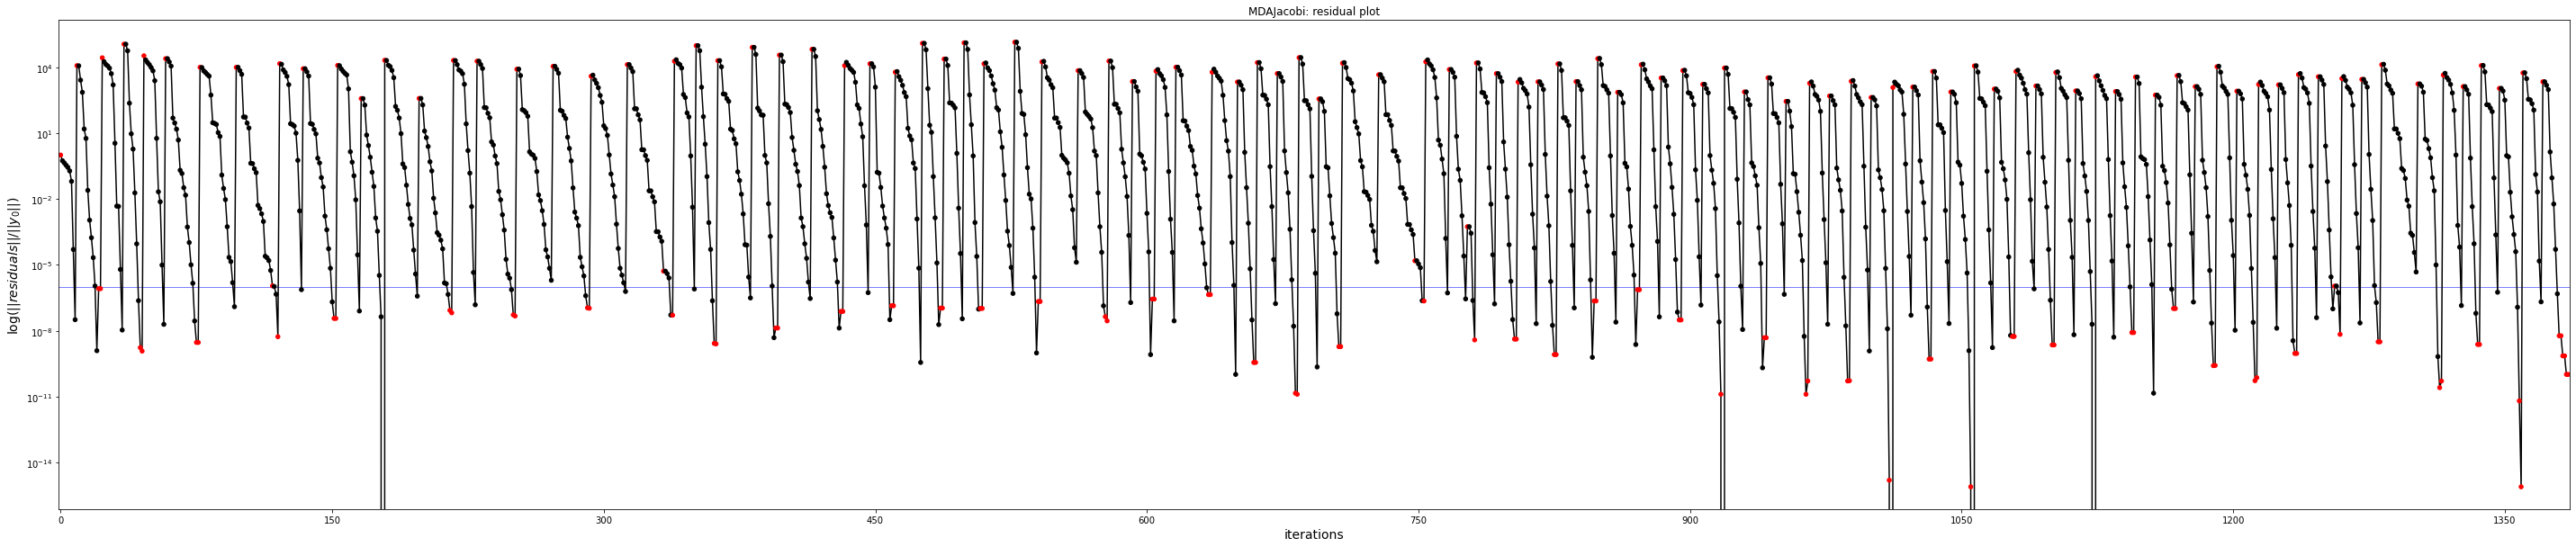

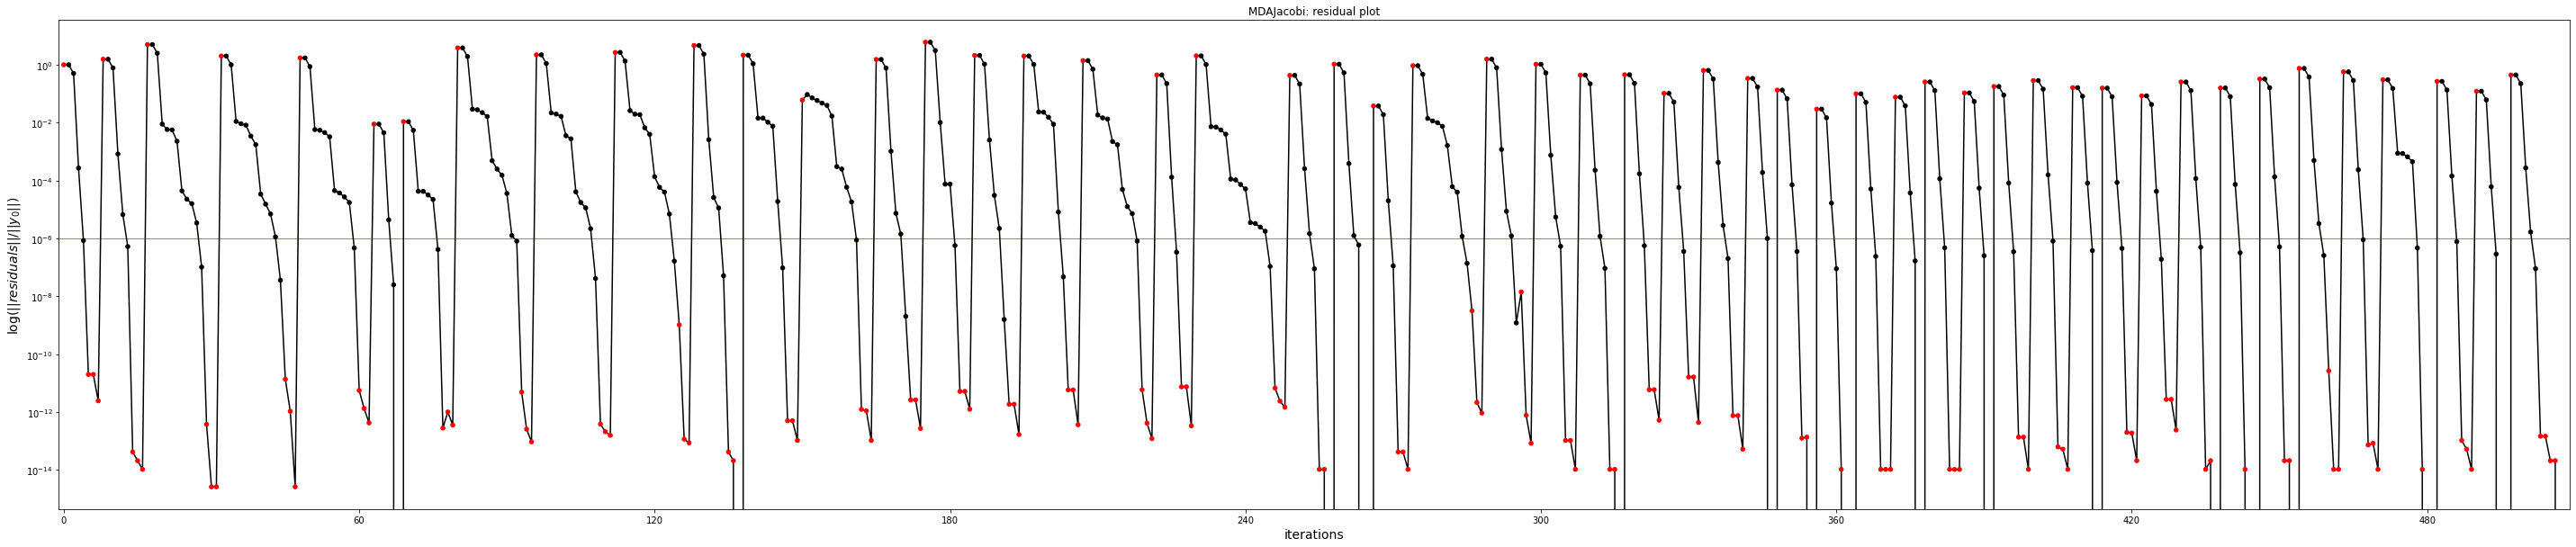

In [89]:
opt_disc.formulation.mda1.plot_residual_history(show=True, save=False)
opt_disc.formulation.mda2.plot_residual_history(show=True, save=False)

In [90]:
#Plot the optimization history view

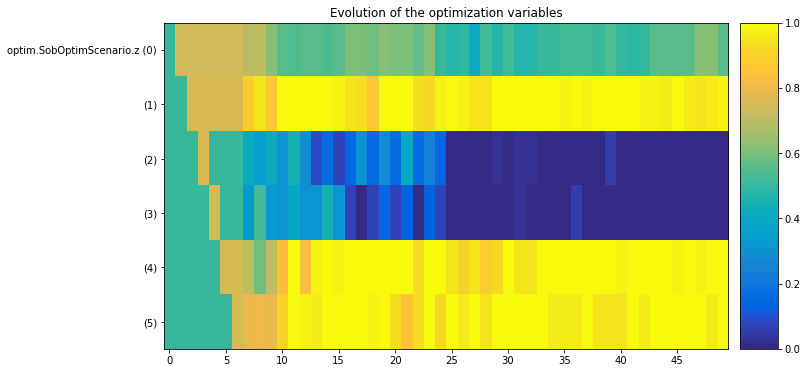

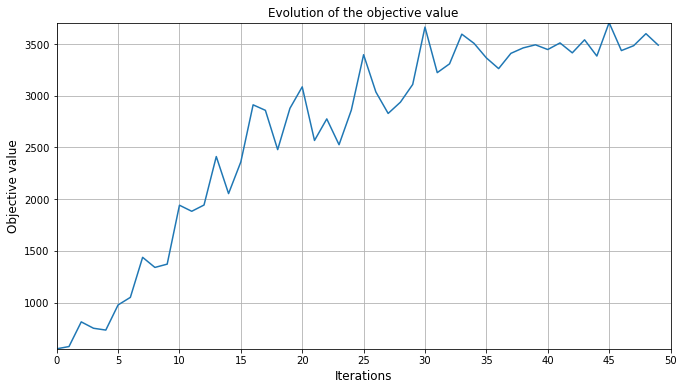

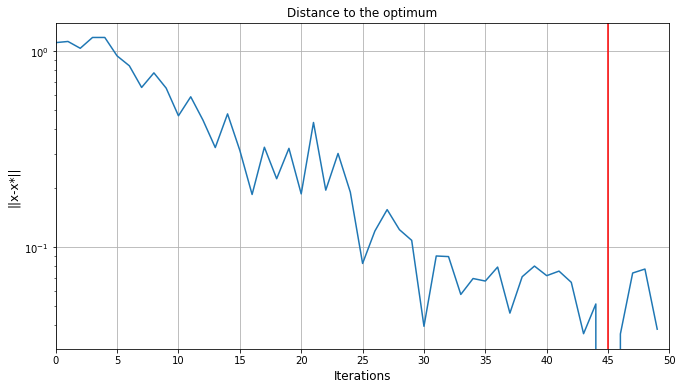

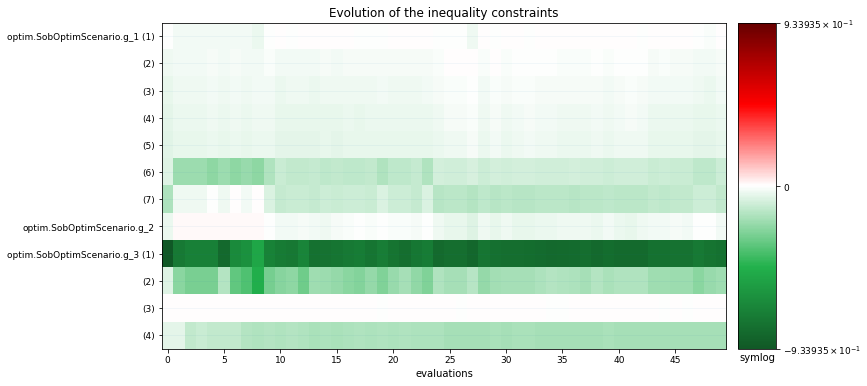

struct: 4914 calls.
aero: 2889 calls.
prop: 2900 calls.
mission: 168 calls.


In [91]:
opt_disc.post_process("OptHistoryView", show=True, save=False)
for disc in [my_struct, my_aero, my_prop, my_mission]:
    print("{}: {} calls.".format(disc.name, disc.n_calls))